# DATA2 - DESCRIPTIVE - FREE SURFER


**Resources**
1. DATA
    1. [data/data2](https://github.com/MMIV-ML/MCI-subgroups/tree/master/data/data2) - csv files downloaded from ADNI,
    1. [data/data2_FS](https://github.com/MMIV-ML/MCI-subgroups/tree/master/data/data2_FS) - FS result csv files,
    1. [data_zip/20201109_data2_file_versions](https://github.com/MMIV-ML/MCI-subgroups/blob/master/data/data_zip/20201109_data2_file_versions.pdf) - download ADNI web page screen shoot taken for downaloaded csv files (some of file neames are printed with dates),
1. RESULTS
    1. [results/20201110](https://github.com/MMIV-ML/MCI-subgroups/tree/master/results/20201110) - result folder,
    1. [results/20201120/README.md](https://github.com/MMIV-ML/MCI-subgroups/blob/master/results/20201110/README.md) - short description,
1. GOOGLE DRIVE
    1. [slides](https://docs.google.com/presentation/d/1aEK7M5BPe0RxWYskzQCEDbT4Mf-4mRRqQ5uJ_YuqRzg/edit#slide=id.p) - link to google slides (**OUT OF DATE, MUST BE UPDATED !!!**),
    1. [GoogleDrive](https://drive.google.com/drive/folders/1r8l2R88-0T8Xahk30iAgjBCWXvV1R2J-) - main google drive slide folder,
1. GIT HUB
    1. [GitHub](https://github.com/MMIV-ML/MCI-subgroups) - main repo folder,
1. FEATURES
    1. Included features ([local](../results/20201110/features_included.csv), [GitHub](https://github.com/MMIV-ML/MCI-subgroups/blob/master/results/20201110/features_included.csv)) - a file with a feature list included in each subproject (sMCI-cAD, baseline) 
    1. Features to include ([local](../results/20201110/features_to_include.csv), [GitHub](https://github.com/MMIV-ML/MCI-subgroups/blob/master/results/20201110/features_to_include.csv))- a least of featrues from different csv files to combine with ADNIMERGE  



The latest changes (ver. 0.01):

    -  root file
    
   *Created: 2021.04.04 / Updated: 2021.04.06

---

#### STEPS:

1. Replace long names with shorter versions (e.g. Left-Lateral-Ventricls --> LLV)
1. Replace eTIV_x and eTIV_y with eTIV if both are equalled
1. Add new auxiliary columns:
    - sum of lateral ventricles $$LRLV = LLV + RLV$$ 
    - normalized sum of lateral vetnricles $$LRLV_n=\frac{LLV + RLV}{eTIV}$$
1. Statistical measures: long vs cross 
    - Mean absolute error   $$MAE=\frac{\sum_{i=1}^n |y_l - y_c| }{n}$$
    - Root Mean Square Error (RMSE)  $$RMSE=\sqrt{\frac{\sum_{i=1}^n (y_l - y_c)^2 }{n}}$$
1. Basic result exploration

---

#### IMPORTS

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#### SUPPRESS SOME DIVISION WORNINGS :(

In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [3]:
import pandas as pd
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt

from pathlib import Path

#### MCI MODULES

In [4]:
# our imports 
import mci_get as mget
import mci_info as minfo
import mci_utils as mutils
import mci_freesurfer as mfs

# DEFAULT VALUE: 6
pd.options.display.precision = 2
#pd.set_option('display.max_columns', None)

#### GLOBAL VARIABLES

In [5]:
# Notebook folder
NB_DIR = %pwd
NB_DIR = Path(NB_DIR)
# Root MCI foler
ROOT_DIR = NB_DIR.parent
# Data folder
DATA_DIR = ROOT_DIR/'data/data2'
# Results folder
RESULTS_DIR = ROOT_DIR/'results'
#RESULTS_DIR.mkdir(parents=True, exist_ok=True)

#### INSTALLED PACKAGES INFO

In [6]:
if 1:
    packages = ['numpy', 'scipy', 'seaborn', 'pandas', 'matplotlib', 'statsmodels', 'ipywidgets', 'eli5', 'pdpbox']
    display(mutils.package_versions(installedOnly=False, theMostImportant=packages))



Computer name: mk-prec-7540
Operating system: Linux, 64bit

Python path: /home/marek/miniconda3/envs/py37/bin/python
Python version: 3.7.7 (default, Mar 26 2020, 15:48:22) 
[GCC 7.3.0]



,module,version
4,eli5,0.11.0
6,ipywidgets,7.6.2
9,matplotlib,3.3.4
11,numpy,1.19.2
13,pandas,1.1.5
14,pdpbox,0.2.1
18,scipy,1.5.2
19,seaborn,0.11.1
22,statsmodels,0.11.1


---

# LOAD FILES

In [7]:
long_all = pd.read_csv(RESULTS_DIR / '20201110' / 'long.csv', index_col=0, low_memory=False)
print(f'Rows:\t{long_all.shape[0]}')

Rows:	6327


### SELECT TRAIN SUBSET 

In [8]:
long = long_all.loc[long_all.Usage_ == 'train']
print(f'Rows:\t{long.shape[0]}')

Rows:	5021


---

# LONG

In [9]:
minfo.included_feature_info(long, pattern='adni-adas-neuro-gds-cross-long-_')

Total number of columns: 94



,adni (#30),adas (#16),neuro (#14),gds (#5),long (#7),cross (#7),ours (#15)
0,ABETA,MERGE_long_adas,ANARTERR_neuro,EXAMDATE_gds,Left-Hippocampus_long,Left-Hippocampus_cross,ADAS13_adni_Nr_
1,ADAS13_adni,Q10_adas,AVDEL30MIN_neuro,GDTOTAL_gds,Left-Lateral-Ventricle_long,Left-Lateral-Ventricle_cross,Abeta_
2,AGE,Q11_adas,AVDELTOT_neuro,MERGE_long_gds,Right-Hippocampus_long,Right-Hippocampus_cross,Age_at_scan_
3,APOE4,Q12_adas,AVTOT6_neuro,Phase_gds,Right-Lateral-Ventricle_long,Right-Lateral-Ventricle_cross,Age_at_scan_rounded_
4,CDRSB,Q13_adas,AVTOTB_neuro,VISCODE2_gds,complete_long,complete_cross,Age_bin_
5,DX,Q1_adas,CATANIMSC_neuro,,eTIV_x_long,eTIV_x_cross,Age_rounded_
6,DX_bl,Q2_adas,CLOCKSCOR_neuro,,eTIV_y_long,eTIV_y_cross,Idx_
7,EXAMDATE,Q3_adas,COPYSCOR_neuro,,,,Imageuid_
8,FAQ,Q4_adas,EXAMDATE_neuro,,,,MRIs_Nr_
9,IMAGEUID,Q5_adas,MERGE_long_neuro,,,,Participation_length_yr_


---

### COLUMN SELECTION FROM ADNIMERGE

In [10]:
cols_scores = ['RID', 'PTID', 'AGE', 'Age_rounded_', 'Age_at_scan_', 'Age_at_scan_rounded_','Imageuid_', 'MRIs_Nr_']
cols_long = [c for c in long.columns if c.endswith('_long')]
cols_cross = [c for c in long.columns if c.endswith('_cross')]

cols = cols_scores + cols_long + cols_cross

In [11]:
long = long[cols].copy()

In [12]:
minfo.included_feature_info(long, pattern='adni-adas-neuro-gds-cross-long-_')

Total number of columns: 22



,adni (#3),adas (#0),neuro (#0),gds (#0),long (#7),cross (#7),ours (#5)
0,AGE,,,,Left-Hippocampus_long,Left-Hippocampus_cross,Age_at_scan_
1,PTID,,,,Left-Lateral-Ventricle_long,Left-Lateral-Ventricle_cross,Age_at_scan_rounded_
2,RID,,,,Right-Hippocampus_long,Right-Hippocampus_cross,Age_rounded_
3,,,,,Right-Lateral-Ventricle_long,Right-Lateral-Ventricle_cross,Imageuid_
4,,,,,complete_long,complete_cross,MRIs_Nr_
5,,,,,eTIV_x_long,eTIV_x_cross,
6,,,,,eTIV_y_long,eTIV_y_cross,


---

### 1. RENAME LONG LATERAL-VETRICLE-CROSS COLUMN NAME WITH SHORTER ONES

In [13]:
long = mfs.shorten_FS_long_names(long, verbose=True)

Renamed the following column names:

	Left-Lateral-Ventricle-long ---> LLV_long
	Right-Lateral-Ventricle_long ---> RLV_long
	Left-Lateral-Ventricle_cross ---> LLV_cross
	Right-Lateral-Ventricle_cross ---> RLV_cross

	Left-Hippocampus_cross ---> LHHC_cross
	Right-Hippocampus_cross ---> RHHC_cross
	Left-Hippocampus_long ---> LHHC_long
	Right-Hippocampus_long ---> RHHC_long


---

if 'Right-Lateral-Ventricle_cross' in cols:
        df_long.rename({'Right-Lateral-Ventricle_cross':'RLV_cross'}, axis='columns', inplace=True)
        print('\tRight-Lateral-Ventricle_cross ---> RLV_cross')if 'Right-Lateral-Ventricle_cross' in cols:
        df_long.rename({'Right-Lateral-Ventricle_cross':'RLV_cross'}, axis='columns', inplace=True)
        print('\tRight-Lateral-Ventricle_cross ---> RLV_cross')### 2. COMPARE e\_TIV\_x AND e\_TIV\_y


For long and cross eTIV_x and e_TIV_y are compared. If both are equalled:
- rename e\_TIV\_x to e\_TIV
- drop e\_TIV\_y from the table

In [14]:
long = mfs.compare_eTIV_x_and_eTIV_y(long, verbose=True)


#############
### cross ###
#############

Empty values:
  eTIV_x_cross: #NaN = 2013 
  eTIV_y_cross: #NaN = 2013 
Compare values in eTIV_x_cross and eTIV_y_cross:
  All equall: True
  Rename eTIV_x_cross ---> eTIV_cross
  Drop eTIV_y_cross from the dataframe

############
### long ###
############

Empty values:
  eTIV_x_long: #NaN = 2018 
  eTIV_y_long: #NaN = 2018 
Compare values in eTIV_x_long and eTIV_y_long:
  All equall: True
  Rename eTIV_x_long ---> eTIV_long
  Drop eTIV_y_long from the dataframe


---

### 3. CALCULATE SUM AND NORMALIZED SUM OF LEFT AND RIGHT LATERAL VETNRICE VOLUMES

Add new auxiliary columns:

1. LRLV\_{cross, long} - sum of left and right lateral ventricles $$LRLV = LLV + RLV$$ 
2. LRLV\_n\_{cross, long} - normalized sum of left and right lateral vetnricles $$LRLV_n=\frac{LLV + RLV}{eTIV}$$

In [15]:
long = mfs.calculate_sum_of_vetricle_volumes(long, verbose=True)

Added a new column: LRLV_long
Added a nem column: LRLV_n_long

Added a new column: LRLV_cross
Added a new column: LRLV_n_cross


In [16]:
long = mfs.calculate_sum_of_hippocampus_volumes(long, verbose=True)

Added a new column: LRHHC_long
Added a nem column: LRHHC_n_long

Added a new column: LRHHC_cross
Added a new column: LRHHC_n_cross


---

### 4. STATISTICAL MEASURES TO COMPARE CROSS AND LONG 


Here two error measures are calculated for selected feature `ft`. Those errors are saved in an extra columns with feature name as a prefix e.g. `LLV_MSE_` and `LLV_RMSE_`. Measures are calculated for each patient separately taking into accoutn only finite values.

1. Mean absolute error

$$MAE\_=\frac{\sum_{i=1}^n |y_l - y_c| }{n}$$
2. Root Mean Square Error (RMSE)
$$RMSE\_=\sqrt{\frac{\sum_{i=1}^n (y_l - y_c)^2 }{n}}$$

where:
- y_l - \_long feature value,
- y_c - \_cross feature value,
- n - number of visits with finite feature values for each patient.

In [17]:
features = ['LLV', 'RLV', 'LRLV', 'LRLV_n', 'LHHC', 'RHHC', 'LRHHC', 'LRHHC_n']
for f in features: 
    long = mfs.stats_measures(long, ft=f, verbose=True)

Added a new column with "Mean absolute error": LLV_MAE_ 
Added a new column with "Root Mean Square Error (RMSE)": LLV_RMSE_ 

Added a new column with "Mean absolute error": RLV_MAE_ 
Added a new column with "Root Mean Square Error (RMSE)": RLV_RMSE_ 

Added a new column with "Mean absolute error": LRLV_MAE_ 
Added a new column with "Root Mean Square Error (RMSE)": LRLV_RMSE_ 

Added a new column with "Mean absolute error": LRLV_n_MAE_ 
Added a new column with "Root Mean Square Error (RMSE)": LRLV_n_RMSE_ 

Added a new column with "Mean absolute error": LHHC_MAE_ 
Added a new column with "Root Mean Square Error (RMSE)": LHHC_RMSE_ 

Added a new column with "Mean absolute error": RHHC_MAE_ 
Added a new column with "Root Mean Square Error (RMSE)": RHHC_RMSE_ 

Added a new column with "Mean absolute error": LRHHC_MAE_ 
Added a new column with "Root Mean Square Error (RMSE)": LRHHC_RMSE_ 

Added a new column with "Mean absolute error": LRHHC_n_MAE_ 
Added a new column with "Root Mean Square

---

### PRINT CURRENT TABLE CONTENT

In [18]:
minfo.included_feature_info(long, pattern='adni-adas-neuro-gds-cross-long-_')

Total number of columns: 44



,adni (#3),adas (#0),neuro (#0),gds (#0),long (#10),cross (#10),ours (#21)
0,AGE,,,,LHHC_long,LHHC_cross,Age_at_scan_
1,PTID,,,,LLV_long,LLV_cross,Age_at_scan_rounded_
2,RID,,,,LRHHC_long,LRHHC_cross,Age_rounded_
3,,,,,LRHHC_n_long,LRHHC_n_cross,Imageuid_
4,,,,,LRLV_long,LRLV_cross,LHHC_MAE_
5,,,,,LRLV_n_long,LRLV_n_cross,LHHC_RMSE_
6,,,,,RHHC_long,RHHC_cross,LLV_MAE_
7,,,,,RLV_long,RLV_cross,LLV_RMSE_
8,,,,,complete_long,complete_cross,LRHHC_MAE_
9,,,,,eTIV_long,eTIV_cross,LRHHC_RMSE_


### INTERACTIVE DISPLAY LONG VS. CROSS FOR EACH PATIENT

It is possible to iterate over subjects with buttons. `ipywidgets` library must be installed.
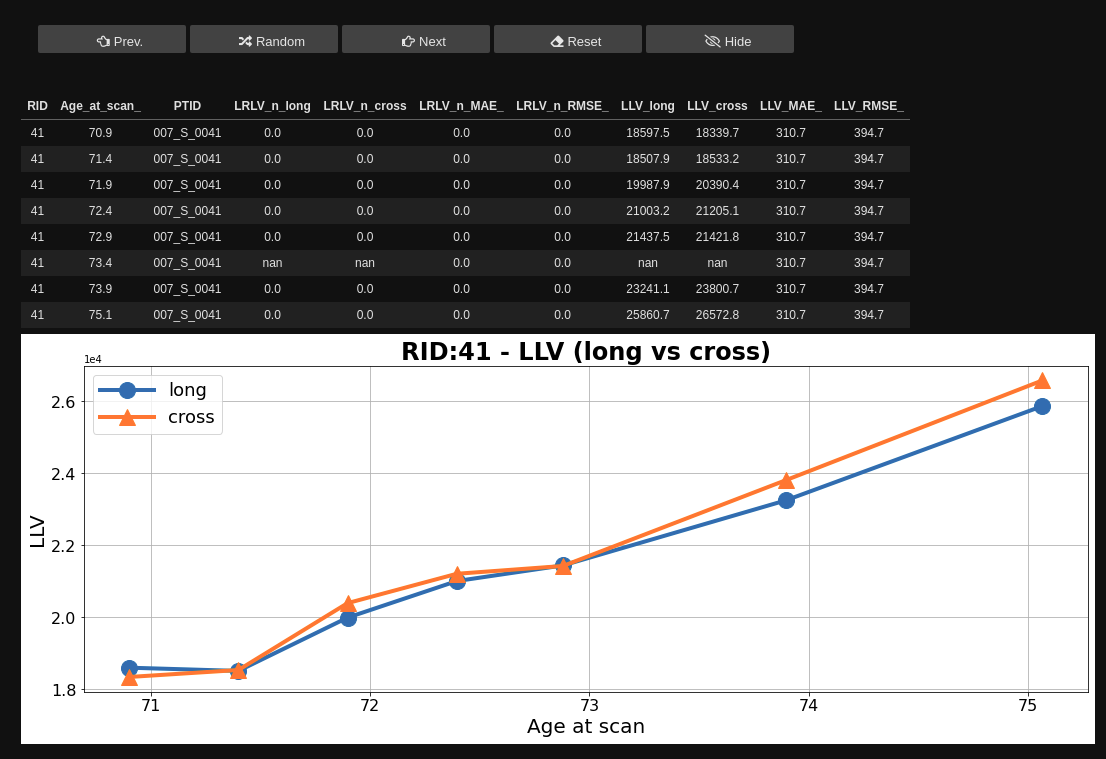

In [29]:
# set display precision
pd.options.display.precision = 5

feature = 'LRLV_n'
cols = []
cols = ['RID', 'PTID', 'Age_at_scan_'] + [f for f in long.columns if f.startswith(feature)]
mfs.iterate_patient_GUI_with_plot(long[cols], rid=None, feature_prefix=feature)